In [11]:
#Import Library
from sklearn import datasets # To Get iris dataset
from sklearn import svm # To fit the svm classifier
import numpy as np
import matplotlib.pyplot as plt # To visualize the data

In [12]:
iris_dataset = datasets.load_iris()
print('Iris data set Description', iris_dataset['DESCR'])

Iris data set Description .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ====

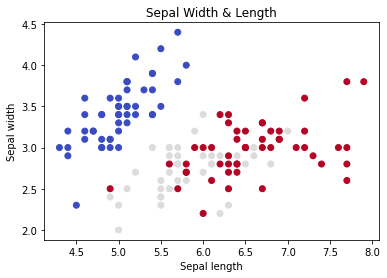

In [13]:
# Visualize the data
def visualize_sepal_data():
 iris = datasets.load_iris()
 X = iris.data[:, :2] # we only take the first two features.
 y = iris.target
 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
 plt.xlabel('Sepal length')
 plt.ylabel('Sepal width')
 plt.title('Sepal Width & Length')
 plt.show()
visualize_sepal_data()

In [14]:
# Modeling using different Kernal Svm Classifier
iris = datasets.load_iris()
X = iris.data[:, :2] # considering only the two Sepal features.
y = iris.target
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y) # SVC with linear kernel
lin_svc = svm.LinearSVC(C=C).fit(X, y) # LinearSVC (linear kernel)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y) # SVC with RBF kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y) # SVC with polynomial kernel
h = 0.02 # step size in the mesh

/home/parth/anaconda3/envs/tfenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


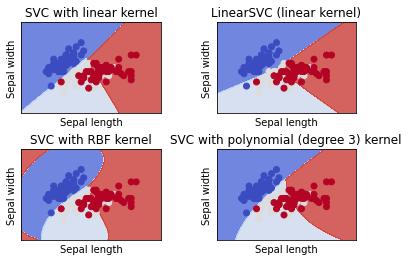

In [15]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)', 'SVC with RBF kernel',
 'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
 # Plot the decision boundary. For that, we will assign a color to each
 # point in the mesh [x_min, x_max]x[y_min, y_max].
 plt.subplot(2, 2, i + 1)
 plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

 # Put the result into a color plot
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 # Plot also the training points
 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
 plt.xlabel('Sepal length')
 plt.ylabel('Sepal width')
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())
 plt.xticks(())
 plt.yticks(())
 plt.title(titles[i])
plt.show()

In [26]:
from sklearn.metrics import accuracy_score

svc_pred = svc.predict(X)
accuray = accuracy_score(svc_pred,y)
print('SVC Accuracy : ', accuray)


SVC Accuracy :  0.82


In [30]:
svc_pred = lin_svc.predict(X)
accuray = accuracy_score(svc_pred,y)
print('Lin_SVC Accuracy : ', accuray)

Lin_SVC Accuracy :  0.8


In [31]:
svc_pred = rbf_svc.predict(X)
accuray = accuracy_score(svc_pred,y)
print('rbf_SVC Accuracy : ', accuray)

rbf_SVC Accuracy :  0.8266666666666667


In [32]:
svc_pred = poly_svc.predict(X)
accuray = accuracy_score(svc_pred,y)
print('Poly_SVC Accuracy : ', accuray)

Poly_SVC Accuracy :  0.8133333333333334
